# Lecture 16

## Integrating Functions Using Monte Carlo Methods

Say we pick a random number in the range $[a, b)$ and another in the range $(c, d]$. Let these represent our coordinates on a grid. We want to find the area under the curve within this grid. To do this, we can if $y \geq f(x)$. If yes, we can increment the counter, else, we continue until $N$ trials. So, the area under the curve would be $\frac{(b - a)(c - d) \cdot \text{counter}}{N}$. 

$(b-a)(c-d)$ is the total area of the box, and the $\text{counter}/N$ term is the fraction of the points picked under the curve, which is proportional to the area under the curve. This method works 1D, but it is particularly useful for integrals in higher dimensions. Here, Monte Carlo works because we're 'rejecting values'. This is a faster method when it comes to integrating functions.

How good is the convergence?

Let $I = \int_a^bf(x)dx$ and let $I_{\text{est}}$ be the estimated area that depends on the number of points $N$. 

$|I - I_{\text{est}}| = O(n^{-\alpha})$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
    return np.exp(x)

def MC_area(lim_x, lim_y, N):
    count = 0
    for j in range(N):
        x, y = np.random.uniform(lim_x[0], lim_x[1]), np.random.uniform(lim_y[0], lim_y[1]) # randomly choosing from the ranges
        f_x = f(x)
        if y <= f_x:
            count += 1
        else:
            continue
    return (lim_x[1] - lim_x[0])*(lim_y[1] - lim_y[0])*(count/N)

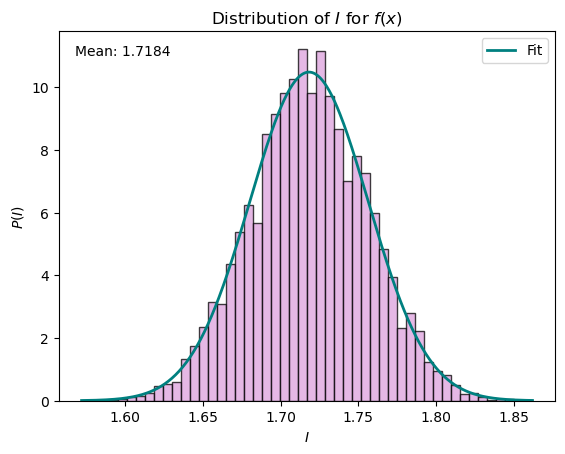

In [ ]:
iters, N = 10000, 10000
all_I = np.zeros(iters)

for i in range(0, iters):
    all_I[i] = (MC_area([0, 1], [0, 10], N))

all_I = np.array(all_I)
I_mean = np.mean(all_I)
sigma = np.std(all_I)

# to plot actual curve
mu = np.exp(1) - np.exp(0)

x_vals = np.linspace(min(all_I), max(all_I), 500)
pdf_vals = (1/(sigma*np.sqrt(2 * np.pi))) * np.exp(-((x_vals - mu)**2)/(2 * sigma**2)) # this is for the fit

plt.hist(all_I, density = True, bins = 50, alpha = 0.75, color = 'plum', edgecolor = 'k') # we get something like a Gaussian
plt.plot(x_vals, pdf_vals, color = 'teal', linewidth = 2, label = 'Fit')
plt.xlabel(r'$I$')
plt.ylabel(r'$P(I)$')
plt.title(f'Distribution of $I$ for $f(x)$')
plt.figtext(0.15, 0.83, f'Mean: {round(I_mean, 4)}')
plt.legend()
plt.show()

## Law of Large Numbers and Central Limit Theorem (Continued)

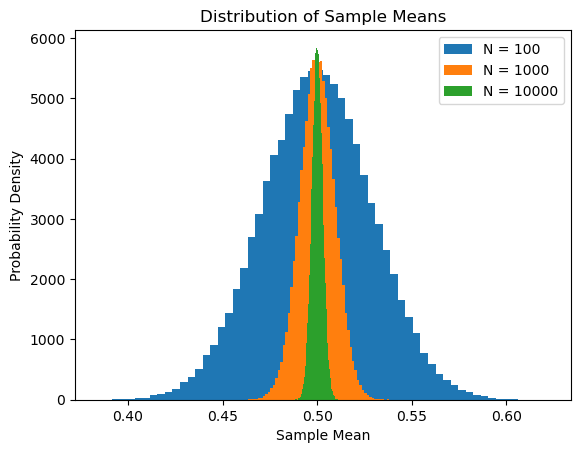

In [ ]:
def central_lim(N, iters, hist = False):
    avg = np.zeros(iters)
    for i in range(iters):
        n = np.random.random(N)
        avg[i] = np.mean(n) # means

    if hist:
        plt.hist(avg, bins = 60, label = f'N = {N}')
        plt.xlabel('Sample Mean')
        plt.ylabel('Probability Density')
        plt.title(f'Distribution of Sample Means')
        plt.legend()

central_lim(100, 100000, hist = True)
central_lim(1000, 100000, hist = True)
central_lim(10000, 100000, hist = True)